# Problems and plane-wave discretisations

In this example we want to show how DFTK can be used to solve simple one-dimensional
periodic problems. Along the lines this notebook serves as a concise introduction into
the underlying theory and jargon for solving periodic problems using plane-wave
discretizations.

## Periodicity and lattices
A periodic problem is characterized by being invariant to certain translations.
For example the $\sin$ function is periodic with periodicity $2π$, i.e.
$$
   \sin(x) = \sin(x + 2πm) \quad ∀ m ∈ \mathbb{Z},
$$
This is nothing else than saying that any translation by an integer multiple of $2π$
keeps the $\sin$ function invariant. More formally, one can use the
translation operator $T_{2πm}$ to write this as:
$$
   T_{2πm} \, \sin(x) = \sin(x - 2πm) = \sin(x).
$$

Whenever such periodicity exists one can exploit it to save computational work.
Consider a problem in which we want to find a function $f : \mathbb{R} → \mathbb{R}$,
but *a priori* the solution is known to be periodic with periodicity $a$. As a consequence
of said periodicity it is sufficient to determine the values of $f$ for all $x$ from the
interval $[-a/2, a/2)$ to uniquely define $f$ on the full real axis. Naturally exploiting
periodicity in a computational procedure thus greatly reduces the required amount of work.

Let us introduce some jargon: The periodicity of our problem implies that we may define
a **lattice**
```
        -3a/2      -a/2      +a/2     +3a/2
       ... |---------|---------|---------| ...
                a         a         a
```
with lattice constant $a$. Each cell of the lattice is an identical periodic image of
any of its neighbors. For finding $f$ it is thus sufficient to consider only the
problem inside a **unit cell** $[-a/2, a/2)$ (this is the convention used by DFTK, but this is arbitrary, and for instance $[0,a)$ would have worked just as well).

## Periodic operators and the Bloch transform
Not only functions, but also operators can feature periodicity.
Consider for example the **free-electron Hamiltonian**
$$
    H = -\frac12 Δ.
$$
In free-electron model (which gives rise to this Hamiltonian) electron motion is only
by their own kinetic energy. As this model features no potential which could make one point
in space more preferred than another, we would expect this model to be periodic.
If an operator is periodic with respect to a lattice such as the one defined above,
then it commutes with all lattice translations. For the free-electron case $H$
one can easily show exactly that, i.e.
$$
   T_{ma} H = H T_{ma} \quad  ∀ m ∈ \mathbb{Z}.
$$
We note in passing that the free-electron model is actually very special in the sense that
the choice of $a$ is completely arbitrary here. In other words $H$ is periodic
with respect to any translation. In general, however, periodicity is only
attained with respect to a finite number of translations $a$ and we will take this
viewpoint here.

**Bloch's theorem** now tells us that for periodic operators,
the solutions to the eigenproblem
$$
    H ψ_{kn} = ε_{kn} ψ_{kn}
$$
satisfy a factorization
$$
    ψ_{kn}(x) = e^{i k⋅x} u_{kn}(x)
$$
into a plane wave $e^{i k⋅x}$ and a lattice-periodic function
$$
   T_{ma} u_{kn}(x) = u_{kn}(x - ma) = u_{kn}(x) \quad ∀ m ∈ \mathbb{Z}.
$$
In this $n$ is a labeling integer index and $k$ is a real number,
whose details will be clarified in the next section.
The index $n$ is sometimes also called the **band index** and
functions $ψ_{kn}$ satisfying this factorization are also known as
**Bloch functions** or **Bloch states**.

Consider the application of $2H = -Δ = - \frac{d^2}{d x^2}$
to such a Bloch wave. First we notice for any function $f$
$$
   -i∇ \left( e^{i k⋅x} f \right)
   = -i\frac{d}{dx} \left( e^{i k⋅x} f \right)
   = k e^{i k⋅x} f + e^{i k⋅x} (-i∇) f = e^{i k⋅x} (-i∇ + k) f.
$$
Using this result twice one shows that applying $-Δ$ yields
$$
\begin{aligned}
   -\Delta \left(e^{i k⋅x} u_{kn}(x)\right)
   &= -i∇ ⋅ \left[-i∇ \left(u_{kn}(x) e^{i k⋅x} \right) \right] \\
   &= -i∇ ⋅ \left[e^{i k⋅x} (-i∇ + k) u_{kn}(x) \right] \\
   &= e^{i k⋅x} (-i∇ + k)^2 u_{kn}(x) \\
   &= e^{i k⋅x} 2H_k u_{kn}(x),
\end{aligned}
$$
where we defined
$$
    H_k = \frac12 (-i∇ + k)^2.
$$
The action of this operator on a function $u_{kn}$ is given by
$$
    H_k u_{kn} = e^{-i k⋅x} H e^{i k⋅x} u_{kn},
$$
which in particular implies that
$$
   H_k u_{kn} = ε_{kn} u_{kn} \quad ⇔ \quad H (e^{i k⋅x} u_{kn}) = ε_{kn} (e^{i k⋅x} u_{kn}).
$$
To seek the eigenpairs of $H$ we may thus equivalently
find the eigenpairs of *all* $H_k$.
The point of this is that the eigenfunctions $u_{kn}$ of $H_k$
are periodic (unlike the eigenfunctions $ψ_{kn}$ of $H$).
In contrast to $ψ_{kn}$ the functions $u_{kn}$ can thus be fully
represented considering the eigenproblem only on the unit cell.

A detailed mathematical analysis shows that the transformation from $H$
to the set of all $H_k$ for a suitable set of values for $k$ (details below)
is actually a unitary transformation, the so-called **Bloch transform**.
This transform brings the Hamiltonian into the symmetry-adapted basis for
translational symmetry, which are exactly the Bloch functions.
Similar to the case of choosing a symmetry-adapted basis for other kinds of symmetries
(like the point group symmetry in molecules), the Bloch transform also makes
the Hamiltonian $H$ block-diagonal[^1]:
$$
    T_B H T_B^{-1} ⟶ \left( \begin{array}{cccc} H_1&&&0 \\ &H_2\\&&H_3\\0&&&\ddots \end{array} \right)
$$
with each block $H_k$ taking care of one value $k$.
This block-diagonal structure under the basis of Bloch functions lets us
completely describe the spectrum of $H$ by looking only at the spectrum
of all $H_k$ blocks.

[^1]: Notice that block-diagonal is a bit an abuse of terms here, since the Hamiltonian
      is not a matrix but an operator and the number of blocks is infinite.
      The mathematically precise term is that the Bloch transform reveals the fibers
      of the Hamiltonian.

## The Brillouin zone

We now consider the parameter $k$ of the Hamiltonian blocks in detail.

- As discussed $k$ is a real number. It turns out, however, that some of
  these $k∈\mathbb{R}$ give rise to operators related by unitary transformations
  (again due to translational symmetry).
- Since such operators have the same eigenspectrum, only one version needs to be considered.
- The smallest subset from which $k$ is chosen is the **Brillouin zone** (BZ).

- The BZ is the unit cell of the **reciprocal lattice**, which may be constructed from
  the **real-space lattice** by a Fourier transform.
- In our simple 1D case the reciprocal lattice is just
  ```
    ... |--------|--------|--------| ...
           2π/a     2π/a     2π/a
  ```
  i.e. like the real-space lattice, but just with a different lattice constant
  $b = 2π / a$.
- The BZ in our example is thus $B = [-π/a, π/a)$. The members of $B$
  are typically called $k$-points.

## Discretization and plane-wave basis sets

With what we discussed so far the strategy to find all eigenpairs of a periodic
Hamiltonian $H$ thus reduces to finding the eigenpairs of all $H_k$ with $k ∈ B$.
This requires *two* discretisations:

  - $B$ is infinite (and not countable). To discretize we first only pick a finite number
    of $k$-points. Usually this **$k$-point sampling** is done by picking $k$-points
    along a regular grid inside the BZ, the **$k$-grid**.
  - Each $H_k$ is still an infinite-dimensional operator.
    Following a standard Ritz-Galerkin ansatz we project the operator into a finite basis
    and diagonalize the resulting matrix.

For the second step multiple types of bases are used in practice (finite differences,
finite elements, Gaussians, ...). In DFTK we currently support only plane-wave
discretizations.

For our 1D example normalized plane waves are defined as the functions
$$
e_{G}(x) = \frac{e^{i G x}}{\sqrt{a}}  \qquad G \in b\mathbb{Z}
$$
and typically one forms basis sets from these by specifying a
**kinetic energy cutoff** $E_\text{cut}$:
$$
\left\{ e_{G} \, \big| \, (G + k)^2 \leq 2E_\text{cut} \right\}
$$

## Correspondence of theory to DFTK code

Before solving a few example problems numerically in DFTK, a short overview
of the correspondence of the introduced quantities to data structures inside DFTK.

- $H$ is represented by a `Hamiltonian` object and variables for hamiltonians are usually called `ham`.
- $H_k$ by a `HamiltonianBlock` and variables are `hamk`.
- $ψ_{kn}$ is usually just called `ψ`.
  $u_{kn}$ is not stored (in favor of $ψ_{kn}$).
- $ε_{kn}$ is called `eigenvalues`.
- $k$-points are represented by `Kpoint` and respective variables called `kpt`.
- The basis of plane waves is managed by `PlaneWaveBasis` and variables usually just called `basis`.

## Solving the free-electron Hamiltonian

One typical approach to get physical insight into a Hamiltonian $H$ is to plot
a so-called **band structure**, that is the eigenvalues of $H_k$ versus $k$.
In DFTK we achieve this using the following steps:

Step 1: Build the 1D lattice. DFTK is mostly tailored for 3D problems.
Therefore quantities related to the problem space are have a fixed
dimension 3. The convention is that for 1D / 2D problems the
trailing entries are always zero and ignored in the computation.
For the lattice we therefore construct a 3x3 matrix with only one entry.

In [1]:
using DFTK

lattice = zeros(3, 3)
lattice[1, 1] = 20.;

Step 2: Select a model. In this case we choose a free-electron model,
which is the same as saying that there is only a Kinetic term
(and no potential) in the model.

In [2]:
model = Model(lattice; terms=[Kinetic()])

Model(custom, 1D):
    lattice (in Bohr)    : [20        , 0         , 0         ]
                           [0         , 0         , 0         ]
                           [0         , 0         , 0         ]
    unit cell volume     : 20 Bohr³

    num. electrons       : 0
    spin polarization    : none
    temperature          : 0 Ha

    terms                : Kinetic()

Step 3: Define a plane-wave basis using this model and a cutoff $E_\text{cut}$
of 300 Hartree. The $k$-point grid is given as a regular grid in the BZ
(a so-called **Monkhorst-Pack** grid). Here we select only one $k$-point (1x1x1),
see the note below for some details on this choice.

In [3]:
basis = PlaneWaveBasis(model; Ecut=300, kgrid=(1, 1, 1))

PlaneWaveBasis discretization:
    Ecut                 : 300.0 Ha
    fft_size             : (320, 1, 1), 320 total points
    kgrid type           : Monkhorst-Pack
    kgrid                : [1, 1, 1]
    num. irred. kpoints  : 1

    Discretized Model(custom, 1D):
        lattice (in Bohr)    : [20        , 0         , 0         ]
                               [0         , 0         , 0         ]
                               [0         , 0         , 0         ]
        unit cell volume     : 20 Bohr³
    
        num. electrons       : 0
        spin polarization    : none
        temperature          : 0 Ha
    
        terms                : Kinetic()

Step 4: Plot the bands! Select a density of $k$-points for the $k$-grid to use
for the bandstructure calculation, discretize the problem and diagonalize it.
Afterwards plot the bands.

Computing bands along kpath:
       Γ -> X
Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:01


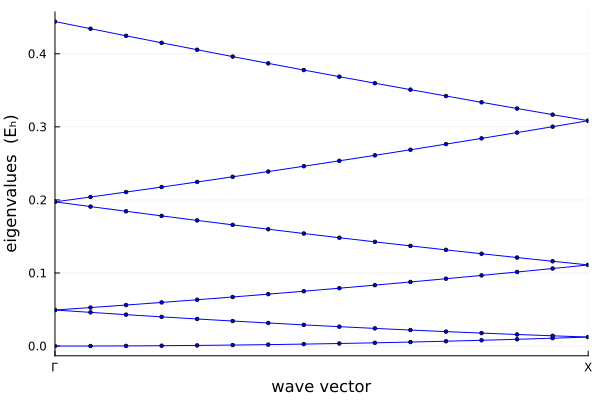

In [4]:
using Unitful
using UnitfulAtomic
using Plots

plot_bandstructure(basis; n_bands=6, kline_density=100)

!!! note "Selection of k-point grids in `PlaneWaveBasis` construction"
    You might wonder why we only selected a single $k$-point (clearly a very crude
    and inaccurate approximation). In this example the `kgrid` parameter specified
    in the construction of the `PlaneWaveBasis`
    is not actually used for plotting the bands. It is only used when solving more
    involved models like density-functional theory (DFT) where the Hamiltonian is
    non-linear. In these cases before plotting the bands the self-consistent field
    equations (SCF) need to be solved first. This is typically done on
    a different $k$-point grid than the grid used for the bands later on.
    In our case we don't need this extra step and therefore the `kgrid` value passed
    to `PlaneWaveBasis` is actually arbitrary.

## Adding potentials
So far so good. But free electrons are actually a little boring,
so let's add a potential interacting with the electrons.

- The modified problem we will look at consists of diagonalizing
  $$
  H_k = \frac12 (-i \nabla + k)^2 + V
  $$
  for all $k \in B$ with a periodic potential $V$ interacting with the electrons.

- A number of "standard" potentials are readily implemented in DFTK and
  can be assembled using the `terms` kwarg of the model.
  This allows to seamlessly construct

  * density-functial theory (DFT) models for treating electronic structures
    (see the Tutorial).
  * Gross-Pitaevskii models for bosonic systems
    (see Gross-Pitaevskii equation in one dimension)
  * even some more unusual cases like anyonic models.

We will use `ElementGaussian`, which is an analytic potential describing a Gaussian
interaction with the electrons to DFTK. See Custom potential for
how to create a custom potential.

A single potential looks like:

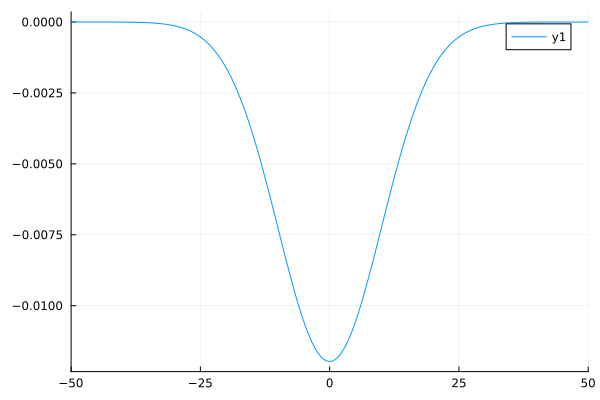

In [5]:
using Plots
using LinearAlgebra
nucleus = ElementGaussian(0.3, 10.0)
plot(r -> DFTK.local_potential_real(nucleus, norm(r)), xlims=(-50, 50))

With this element at hand we can easily construct a setting
where two potentials of this form are located at positions
$20$ and $80$ inside the lattice $[0, 100]$:

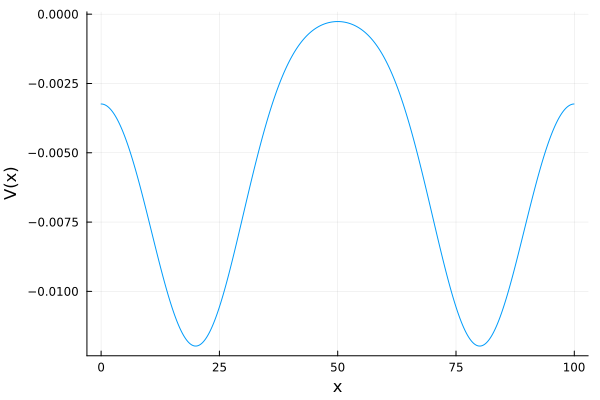

In [6]:
using LinearAlgebra

# Define the 1D lattice [0, 100]
lattice = diagm([100., 0, 0])

# Place them at 20 and 80 in *fractional coordinates*,
# that is 0.2 and 0.8, since the lattice is 100 wide.
nucleus   = ElementGaussian(0.3, 10.0)
atoms     = [nucleus, nucleus]
positions = [[0.2, 0, 0], [0.8, 0, 0]]

# Assemble the model, discretize and build the Hamiltonian
model = Model(lattice, atoms, positions; terms=[Kinetic(), AtomicLocal()])
basis = PlaneWaveBasis(model; Ecut=300, kgrid=(1, 1, 1));
ham   = Hamiltonian(basis)

# Extract the total potential term of the Hamiltonian and plot it
potential = DFTK.total_local_potential(ham)[:, 1, 1]
rvecs = collect(r_vectors_cart(basis))[:, 1, 1]  # slice along the x axis
x = [r[1] for r in rvecs]                        # only keep the x coordinate
plot(x, potential, label="", xlabel="x", ylabel="V(x)")

This potential is the sum of two "atomic" potentials (the two "Gaussian" elements).
Due to the periodic setting we are considering interactions naturally also occur
across the unit cell boundary (i.e. wrapping from `100` over to `0`).
The required periodization of the atomic potential is automatically taken care,
such that the potential is smooth across the cell boundary at `100`/`0`.

With this setup, let's look at the bands:

Computing bands along kpath:
       Γ -> X


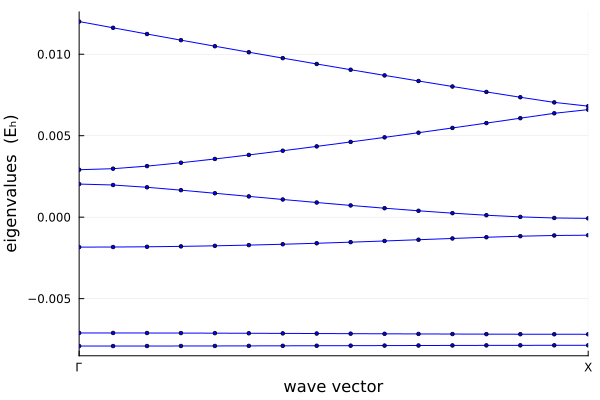

In [7]:
using Unitful
using UnitfulAtomic

plot_bandstructure(basis; n_bands=6, kline_density=500)

The bands are noticeably different.
 - The bands no longer overlap, meaning that the spectrum of $H$ is no longer continuous
   but has gaps.

 - The two lowest bands are almost flat. This is because they represent
   two tightly bound and localized electrons inside the two Gaussians.

 - The higher the bands are in energy, the more free-electron-like they are.
   In other words the higher the kinetic energy of the electrons, the less they feel
   the effect of the two Gaussian potentials. As it turns out the curvature of the bands,
   (the degree to which they are free-electron-like) is highly related to the delocalization
   of electrons in these bands: The more curved the more delocalized. In some sense
   "free electrons" correspond to perfect delocalization.